In [514]:
import pandas as pd
import seaborn as sns
import numpy as np
import math

In [462]:
# data_2021 = pd.read_csv('test_data/2021_fantasy_scores.csv')
# data_2020 = pd.read_csv('test_data/2020_fantasy_scores.csv')
# data_2021 = data_2021[['player_name','player_id','matchup','game_date','fantasy_score','fantasy_score_cumul']]
# data_2020 = data_2020[['player_name','player_id','matchup','game_date','fantasy_score','fantasy_score_cumul']]

# data = pd.concat([data_2020, data_2021])
# data = data.sort_values(by=['player_id','game_date']).reset_index(drop=True)

# expensive code atm. need to refactor using numpy arrays or regular lists
# def n_game_avg(row, n=10):
#     n_games = (data.loc[(data['game_date'] < row['game_date']) & (data['player_id'] == row['player_id'])]
#                    .sort_values(by='game_date', ascending = False)
#                    .head(n))
#     return np.mean(n_games['fantasy_score'])

# this takes forever. so get it over w/
# data_2021['10_game_avg'] = data_2021.apply(lambda x: n_game_avg(x), axis=1)

### Player rating: Self-Comparisoin

In [466]:
df = pd.read_csv('test_data/player_self_comparison.csv')
df['difference'] = df['fantasy_score'] - df['10_game_avg']

<AxesSubplot:>

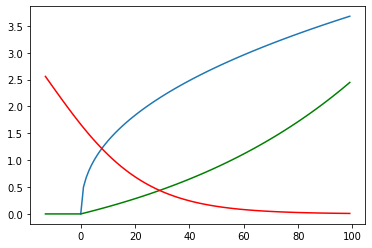

In [590]:
def difference_weight(fs,av=None):
    # difference weight
    if fs == av or (fs == 0 and not av):
        return 0
    
    if av:
        x = abs(fs - av)
        sign = 1 if fs > av else -1
    else:
        x = fs
        sign = 1 if fs > 0 else -1
        
    return sign * 0.5 * math.e**(math.log10(x))

def fs_weight(fs, sign=1):
    # fantasy score weight
    if sign > 0:
        if fs <= 0:
            fs_weight = 0
        else:
            fs_weight = (math.e**(0.0125*fs)-1)
    else:
        fs_weight = 2.5/(math.e**(.056925*fs) + .5)
        
    return fs_weight

diff_range = range(int(min(abs(df['difference']))), 100)
values =     range(int(min(df['fantasy_score'])), 100)
sns.lineplot(x=diff_range, y=[difference_weight(x) for x in diff_range])
sns.lineplot(x=values, y=[fs_weight(x, 1) for x in values],color='green')
sns.lineplot(x=values, y=[fs_weight(x,-1) for x in values],color='red')

<AxesSubplot:xlabel='fantasy_score', ylabel='Count'>

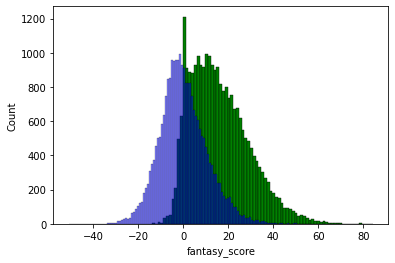

In [529]:
sns.histplot(df['fantasy_score'], color='green', alpha=1)
sns.histplot(df['difference'], color='blue', alpha=0.5)

In [702]:
def weights(fs, av):
    # difference weight
    if fs == av:
        return (0, 0, 0)
        
    else:
        difference = abs(fs - av)
        sign = 1 if fs > av else -1
        diff_weight = sign * 0.5 * math.e**(math.log10(difference))
    
    # fantasy score weight
    if sign > 0:
        if fs <= 0:
            fs_weight = 0
        else:
            fs_weight = (math.e**(0.02125*fs)-1)
    else:
        fs_weight = 2.25/(math.e**(0.05269256416*fs) + .5)
        
    return (round(10*diff_weight * fs_weight, 2), diff_weight, fs_weight)

In [626]:
df['self_comp'] = df.apply(lambda x: weights(x['fantasy_score'], x['10_game_avg'])[0], axis=1)

<AxesSubplot:xlabel='self_comp', ylabel='Count'>

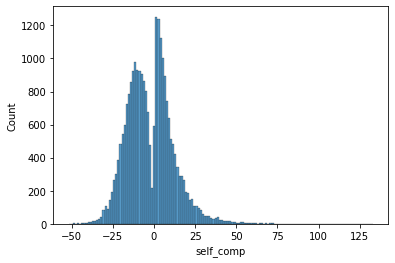

In [627]:
sns.histplot(df['self_comp'])

Player Name:  stephen curry


<AxesSubplot:xlabel='game_date', ylabel='self_comp'>

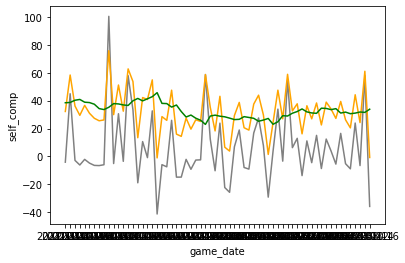

In [707]:
plyr = input('Player Name: ').lower()
plyr_df = df.loc[df['player_name'].str.lower() == plyr]
sns.lineplot(data = plyr_df, x='game_date', y='self_comp', color='grey')
sns.lineplot(data = plyr_df, x='game_date', y='fantasy_score', color='orange')
sns.lineplot(data = plyr_df, x='game_date', y='10_game_avg', color='green')

In [708]:
pd.set_option('display.max_rows', None)
plyr_df = plyr_df[['player_name', 'matchup','game_date','10_game_avg','fantasy_score','difference','self_comp']]
plyr_df.sort_values(by='self_comp')

,player_name,matchup,game_date,10_game_avg,fantasy_score,difference,self_comp
1894,Stephen Curry,GSW @ PHX,2021-11-30,45.81,-1.1,-46.91,-41.45
1938,Stephen Curry,GSW vs. BOS,2022-03-16,33.91,-0.8,-34.71,-35.99
1917,Stephen Curry,GSW vs. UTA,2022-01-23,27.27,1.4,-25.87,-29.31
1909,Stephen Curry,GSW @ DAL,2022-01-05,27.51,3.8,-23.71,-25.84
1908,Stephen Curry,GSW vs. MIA,2022-01-03,28.45,6.6,-21.85,-22.41
1890,Stephen Curry,GSW vs. TOR,2021-11-21,41.67,13.4,-28.27,-19.01
1898,Stephen Curry,GSW vs. POR,2021-12-08,36.93,16.0,-20.93,-14.93
1899,Stephen Curry,GSW @ PHI,2021-12-11,32.24,14.4,-17.84,-14.92
1924,Stephen Curry,GSW @ UTA,2022-02-09,34.13,16.2,-17.93,-13.84
1906,Stephen Curry,GSW vs. DEN,2021-12-28,29.65,18.3,-11.35,-10.35
